<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/LogisticRegression/LogisticRegressionGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

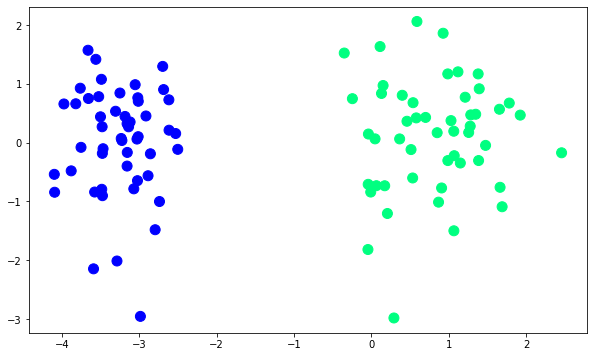

In [ ]:
from sklearn.datasets import make_classification
import numpy as np


X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag') # penalty = none means no regularizatin, solver are different methods to solve for optimization, sag is simple one
lor.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [ ]:
print(lor.coef_)
print(lor.intercept_)

[[4.92767319 0.24391074]]
[5.87079236]


In [ ]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])


x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [ ]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1) # adding 1 in col1
    weights = np.ones(X.shape[1]) # starting line a = b = c, for line ax+by+c=0
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
coef_,intercept_ = gd(X,y)

In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

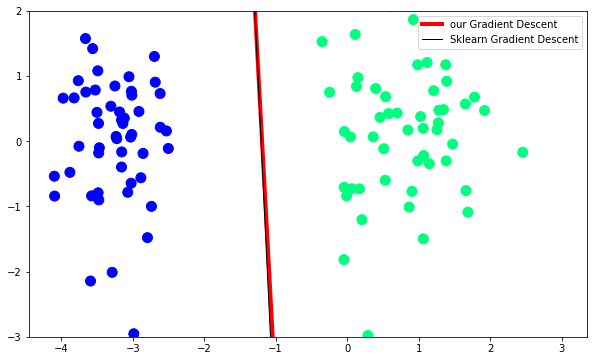

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=4, label="our Gradient Descent")
plt.plot(x_input1,y_input1,color='black',linewidth=1, label="Sklearn Gradient Descent")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()

### above is much better.